In [33]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df = pd.read_csv(r"F:\FINAL\DL_FINAL\No_NaN_values.csv")
df

,aisle_id,aisle,product_id,product_name,department_id,department,order_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,prepared soups salads,209,Italian Pasta Salad,20,deli,94246,5,0,114082,prior,26,0,20,1.0
1,1,prepared soups salads,209,Italian Pasta Salad,20,deli,192465,2,1,119977,prior,2,0,16,3.0
2,1,prepared soups salads,209,Italian Pasta Salad,20,deli,195206,18,1,1519,prior,7,2,9,5.0
3,1,prepared soups salads,209,Italian Pasta Salad,20,deli,227717,1,1,161125,prior,7,2,11,11.0
4,1,prepared soups salads,209,Italian Pasta Salad,20,deli,260072,13,0,12012,prior,5,5,11,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33819101,134,specialty wines champagnes,49661,Porto,5,alcohol,2238789,10,1,72244,prior,19,4,23,5.0
33819102,134,specialty wines champagnes,49661,Porto,5,alcohol,2251344,5,1,72244,prior,18,6,10,9.0
33819103,134,specialty wines champagnes,49661,Porto,5,alcohol,2616249,2,0,100075,prior,8,4,17,9.0
33819104,134,specialty wines champagnes,49661,Porto,5,alcohol,2715237,1,0,135045,prior,3,6,14,30.0


In [37]:
df.isnull().sum()

aisle_id                  0
aisle                     0
product_id                0
product_name              0
department_id             0
department                0
order_id                  0
add_to_cart_order         0
reordered                 0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

OUTLIERS


In [38]:
#Finding the minimum and Maximum value for the column "reordered"
min_value = df['reordered'].min()
print(f"Minimum value in '{'reordered'}':", min_value)
max_value = df['reordered'].max()
print(f"Maximum value in '{'reordered'}':", max_value)

 

Minimum value in 'reordered': 0
Maximum value in 'reordered': 1


In [39]:
#Finding the minimum and Maximum value for the column "add_to_cart_order"
min_value = df['add_to_cart_order'].min()
print(f"Minimum value in '{'add_to_cart_order'}':", min_value)
max_value = df['add_to_cart_order'].max()
print(f"Maximum value in '{'add_to_cart_order'}':", max_value)

Minimum value in 'add_to_cart_order': 1
Maximum value in 'add_to_cart_order': 145


In [40]:
df['add_to_cart_order'].describe()

count    3.381911e+07
mean     8.367738e+00
std      7.139540e+00
min      1.000000e+00
25%      3.000000e+00
50%      6.000000e+00
75%      1.100000e+01
max      1.450000e+02
Name: add_to_cart_order, dtype: float64

In [ ]:
#Finding the minimum and Maximum value for the column "order_hour_of_day"   #Checking the min and the max value to identify the outliers
min_value = df['order_hour_of_day'].min()
print(f"Minimum value in '{'order_hour_of_day'}':", min_value)
max_value = df['order_hour_of_day'].max()
print(f"Maximum value in '{'order_hour_of_day'}':", max_value)

Minimum value in 'order_hour_of_day': 0
Maximum value in 'order_hour_of_day': 23


In [42]:
#Finding the minimum and Maximum value for the column "days_since_prior_order"
min_value = df['days_since_prior_order'].min()
print(f"Minimum value in '{'days_since_prior_order'}':", min_value)
max_value = df['days_since_prior_order'].max()
print(f"Maximum value in '{'days_since_prior_order'}':", max_value)

Minimum value in 'days_since_prior_order': 0.0
Maximum value in 'days_since_prior_order': 30.0


In [43]:
#Finding the minimum and Maximum value for the column "order_dow"
min_value = df['order_dow'].min()
print(f"Minimum value in '{'order_dow'}':", min_value)
max_value = df['order_dow'].max()
print(f"Maximum value in '{'order_dow'}':", max_value)

Minimum value in 'order_dow': 0
Maximum value in 'order_dow': 6


APPLY LOG TRANSFORMATION AND BOX PLOT FOR VISULIZA1TION

📊 Why Use Log Transformation Before Boxplot?
The original add_to_cart_order is likely positively skewed (e.g., many users add products early, but some very late).
Log transformation helps reduce that skew, making the distribution more symmetric.
Makes the boxplot more interpretable by compressing extreme values.

Applies log1p(x) = log(1 + x) to handle zero values safely.
Helps to normalize right-skewed data and compress outliers.
Creates a boxplot to visualize outliers in the transformed data.

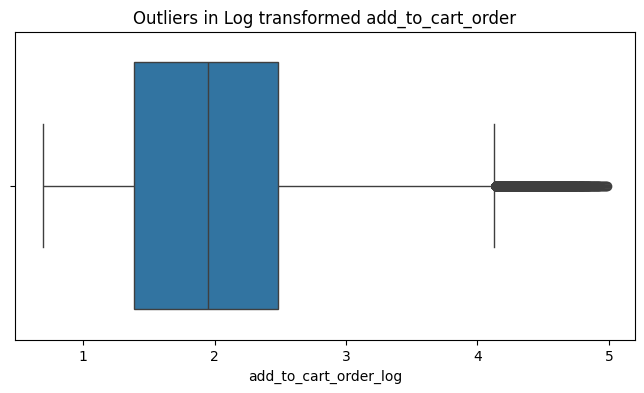

In [ ]:
df['add_to_cart_order_log'] = np.log1p(df['add_to_cart_order'])
plt.figure(figsize = (8,4))
sns.boxplot(x=df['add_to_cart_order_log'])
plt.title('Outliers in Log transformed add_to_cart_order')
plt.show()

IQR METHOD

✅ Why Use IQR Method?
Robust to skewed data: Unlike the mean, it is not influenced by extreme values.

Simple and effective: A widely used method in EDA and preprocessing stages.

Let me know if you'd like to apply this on a real dataset or visualize it!

#🔍 What is IQR?
#The Interquartile Range (IQR) is the range between the first quartile (Q1) and the third quartile (Q3):

IQR = Q3 - Q1   
Q1 (25th percentile): The value below which 25% of the data lies.
Q3 (75th percentile): The value below which 75% of the data lies.

IQR Method for Outlier Detection
Once you calculate Q1 and Q3, you define lower and upper bounds:

Lower Bound = Q1 - 1.5 x IQR
Upper Bound = Q3 + 1.5 x IQR

Any data point < Lower Bound or > Upper Bound is considered an outlier.

In [45]:
Q1 = df['add_to_cart_order'].quantile(0.25)
Q3 = df['add_to_cart_order'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = 120

outliers = df[(df['add_to_cart_order'] < lower_bound) | (df['add_to_cart_order'] > upper_bound)]
outliers

,aisle_id,aisle,product_id,product_name,department_id,department,order_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order_log
345576,3,energy granola bars,18859,Wild Boar Uncured Bar,19,snacks,790903,127,1,129928,prior,38,6,23,5.0,4.852030
472888,3,energy granola bars,33975,Cinnamon Bun White Chocolate Lean Protein & Fi...,19,snacks,790903,134,1,129928,prior,38,6,23,5.0,4.905275
562186,3,energy granola bars,43182,Almond Butter,19,snacks,1564244,144,0,22906,prior,4,2,10,30.0,4.976734
1380054,13,prepared meals,22594,Quattro Formaggi Four Cheeses Pizza,20,deli,1564244,142,0,22906,prior,4,2,10,30.0,4.962845
2112771,17,baking ingredients,23405,Pure Baking Soda,13,pantry,1564244,128,0,22906,prior,4,2,10,30.0,4.859812
3437981,21,packaged cheese,33953,"Cheese, Goat Milk, Purple Haze",16,dairy eggs,1564244,123,0,22906,prior,4,2,10,30.0,4.820282
3808968,23,popcorn jerky,21230,Organic Himalayan Pink Popcorn,19,snacks,1564244,143,0,22906,prior,4,2,10,30.0,4.969813
4972932,24,fresh fruits,18090,Organic Large White Flesh Peach,4,produce,1564244,137,0,22906,prior,4,2,10,30.0,4.927254
5068391,24,fresh fruits,19706,Organic Nectarine,4,produce,1564244,129,0,22906,prior,4,2,10,30.0,4.867534
7832698,26,coffee,17638,Vanilla Coffee Concentrate,7,beverages,790903,132,0,129928,prior,38,6,23,5.0,4.890349


In [46]:
upper_bound

120

Z SCORE METHOD

🚩 Z-Score Method for Outlier Detection
A Z-Score > 3 or < -3 is typically considered an outlier (for a normal distribution).

You can adjust the threshold (e.g., ±2.5) depending on sensitivity.

🔢 What is a Z-Score?
A Z-Score (or standard score) tells you how far a value is from the mean, in units of standard deviation.
Where:
X: the data point
μ: mean of the data
σ: standard deviation of the data

In [47]:
from scipy import stats

df['add_to_cart_order'] = np.abs(stats.zscore(df['add_to_cart_order']))
outliers = df[df['add_to_cart_order'] > 2]
outliers

,aisle_id,aisle,product_id,product_name,department_id,department,order_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order_log
28,1,prepared soups salads,209,Italian Pasta Salad,20,deli,1282836,2.329599,0,143636,prior,8,4,16,8.0000,3.258097
52,1,prepared soups salads,209,Italian Pasta Salad,20,deli,2140698,2.609729,0,1627,prior,5,5,12,5.0000,3.332205
84,1,prepared soups salads,209,Italian Pasta Salad,20,deli,1504504,2.609729,0,839,train,27,1,13,30.0000,3.332205
103,1,prepared soups salads,554,Turkey Chili,20,deli,46432,2.189534,1,59510,prior,31,5,12,28.0000,3.218876
116,1,prepared soups salads,554,Turkey Chili,20,deli,89603,2.749794,0,23869,prior,8,6,12,4.0000,3.367296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33818993,134,specialty wines champagnes,47713,Sparkling Rose,5,alcohol,2443554,3.029924,0,186030,prior,7,5,15,23.0000,3.433987
33819002,134,specialty wines champagnes,47713,Sparkling Rose,5,alcohol,2906888,2.049469,0,58973,prior,9,2,19,6.0000,3.178054
33819050,134,specialty wines champagnes,48984,Dry Sherry,5,alcohol,2995103,2.329599,0,66153,prior,12,3,13,21.0000,3.258097
33819062,134,specialty wines champagnes,48984,Dry Sherry,5,alcohol,3357995,3.169989,0,175547,prior,1,0,13,13.2976,3.465736


In [48]:
from scipy.stats import skew
skewness = skew(df['add_to_cart_order'])
skewness

np.float64(3.088168013377851)

📈 What This Plot Shows
Histogram:
Shows the frequency of values in different bins.
Helps you see where values are concentrated (e.g., lower numbers might be more frequent).
KDE Curve:
A smooth estimate of the distribution.
Helpful to spot skewness, peaks, and spread.

🧠 Why Use Histogram + KDE Together?
Histogram gives a discrete view of data distribution.
KDE gives a continuous, smooth approximation of the underlying probability distribution.
Together, they make it easier to:
Detect skewness (left/right)
Understand the shape of the data
Prepare for transformations (like log1p if skewed)


📊 Example Output Insights
If add_to_cart_order is heavily skewed right (tail on the right), the KDE curve will lean that way, indicating:
Most users add items to cart early (low values).
A few users add items much later (outliers).

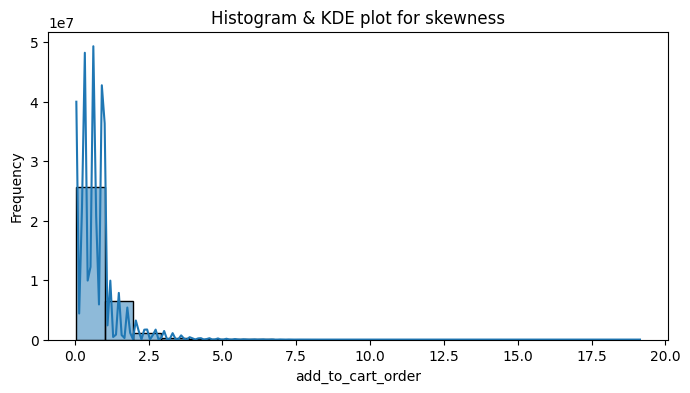

In [49]:
#Histogram with KDE
plt.figure(figsize = (8,4))
sns.histplot(df["add_to_cart_order"], bins=20, kde=True)
plt.title("Histogram & KDE plot for skewness")
plt.xlabel("add_to_cart_order")
plt.ylabel("Frequency")
plt.show()

For my learning process, i have tried all these pre_processing steps for outliers and skewness, even though there are no outliers and skewness in the dataset.

In [50]:
df.to_csv('No_outliers.csv', index = False)